<br><b><font size="3"> Heart Disease Classification Using Machine Learning Algorithms </font></b>
<br>
<br><b><font size="3"> Algoriths Used: </font></b>
<br><font size="3"> 1.K-Nearest Neighbours </font>
<br><font size="3"> 2.Naive Bayes Algorithm </font>
<br><font size="3"> 3.Logistic Regression </font>
<br><font size="3"> 4.Support Vector Machine </font>
<br><font size="3"> 5.Decision Tree </font>
<br><font size="3"> 6.Random Forest Algorithm </font>
<br><font size="3"> 7.Neural Networks </font>

##### Download Data file : https://drive.google.com/file/d/1zIzYbzrwmLlUlvCnE7GsuuEbhKf0t91L/view?usp=sharing

### <b> Data Preprocessing </b>


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [54]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


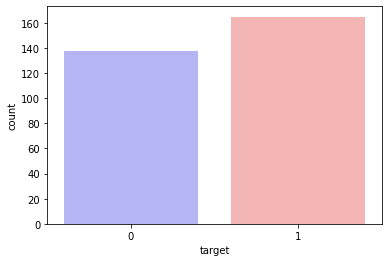

In [3]:
sns.countplot(x="target", data=data, palette="bwr")
plt.show()

In [6]:
countNoDisease = len(data[data.target == 0])
countHaveDisease = len(data[data.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(data.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(data.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


In [20]:
x = np.array(data.drop(['target'], 1))
x=(x - np.min(x)) / (np.max(x) - np.min(x))
y = np.array(data['target'])
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

<b>1.KNN Algorithm</b>
<br>KNN is a simple supervised classification algorithm we can use to assign a class to new data point.  
KNN algorithms use data and classify new data points based on similarity measures (e.g. distance function).
<br>Classification is done by a majority vote to its neighbors i.e among the neighbours the class of the maximum number of neighbours with same class is assigned as its class
<br>As you increase the number of nearest neighbors, the value of k, accuracy might increase.
<br>The value K is the hyper-parametere in this algorithm

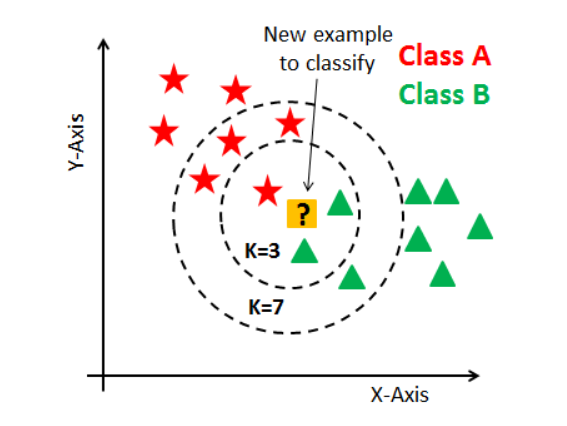

<b>Working:</b>
<br>Determine the parameter K (Number of nearest neighbor).
<br>Calculate the distance between the test – instance and all the training samples.
<br>Sort the distance and determine k-nearest neighbors based on the minimum distance
<br>Then it does the majority vote i.e. the most common class/label among those K entries will be the class of the new data point

<b>Other Distance Measures:</b>
<br>City-block distance (Manhattan distance)- Add absolute value of differences
<br>Cosine similarity- Measure angle formed by the two samples (with the origin)
<br>Jaccard distance- Determine percentage of exact matches between the samples (not including unavailable data)


### <b>Algorithm</b>

In [90]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Score: 60.66%


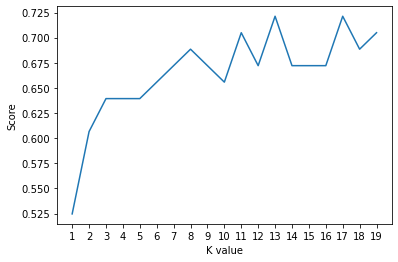

Maximum KNN Score is 72.13%


In [91]:
# try ro find best k value
scoreList = []
accuracies = {}
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

<b>2.Naive Bayes</b>
<br>Naïve Bayes algorithm is a supervised learning algorithm.
<br>Based on Bayes Theorem and used for solving and used for solving classification problem.
<br>Assumption:All features used are independent given the class label Y.
<br>This helps in building the fast machine learning models that can make quik prediction.
<br> Naive bayes has almost no hyper-paramteres to tune


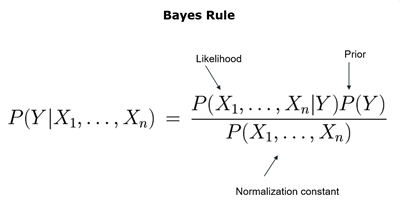
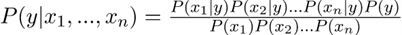


<b>Terms Used:</b>
<br>Prior Probability:This is the probability of event before evidence is presented
<br>Likelihood: It is the product of probabilities of each class given class Y.(Since All classes are assumed to be independent it can be split like this)
<br>Normalization Constant: It is used when we want to calculate class probability to normalize the value so that it is less than 1. We do not have to normalize if we only care about which class the data belongs to.
<br>Posterior Probabiltiy: It is the probability of an event after an evidence is presented.
<br><b>Working:</b>
<br> Using the above formulae we calculate the probabilities of each class and choose the one with maximum value as the correct class
<br> This method can directly be applied for discrete data but in case of continuous data we need to make some assumptions regarding the distribution of values of each feature.The different naive Bayes classifiers differ mainly by the assumptions they make regarding the distribution of P(X/Y)
<br>Some of the classifiers are given below:

<b>Gaussian Naive Bayes classifier:</b>
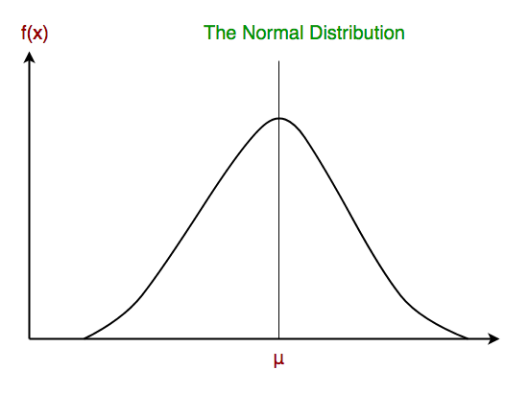
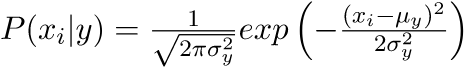

Some other models include:
<br><b>Multinomial Naive Bayes:</b> Feature vectors represent the frequencies with which certain events have been generated by a multinomial distribution. This is the event model typically used for document classification.
<br><b>Bernoulli Naive Bayes:</b> In the multivariate Bernoulli event model, features are independent booleans (binary variables) describing inputs. Like the multinomial model, this model is popular for document classification tasks, where binary term occurrence(i.e. a word occurs in a document or not) features are used rather than term frequencies(i.e. frequency of a word in the document).


### <b>Algorithm:</b>

In [92]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 85.25%


<b>3.Logistic Regression</b>
<br>Logistic Regression is a Machine Learning algorithm which is used for the classification problems, it is a predictive analysis algorithm and based on the concept of probability.
<br>Linear regression is used for predicting the continuous dependent variable using a given set of independent features whereas Logistic Regression is used to predict the categorical dependent variable using a given set of independent variables.
<br> Logistic Regression also does not have any critical hyper-parameter which must be tuned.
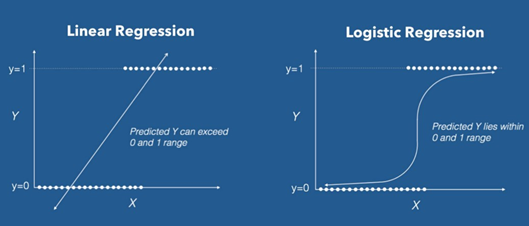
<br>In linear regression we have,
<br>Y(predicted) = (β1*x + βo) + Error value
<br>Where ‘β1’ is the slope and ‘βo’ is the y-intercept similar to the equation of a line.The values ‘β1’ and ‘βo’ must be chosen so that they minimize the error.To check the error we have to calculate the sum of squared error and tune the parameters to try to reduce the error.
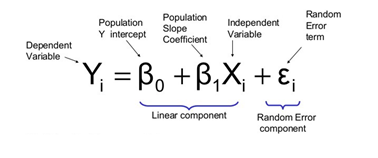
<br>Similarly, in logistic regression, we use sigmoid function. In order to map predicted values to probabilities, we use the Sigmoid function. The function maps any real value into another value between 0 and 1. In machine learning, we use sigmoid to map predictions to probabilities.
<br>The hypothesis of logistic regression tends it to limit the cost function between 0 and 1.
<br>Cost function is a function that maps an event or values of one or more variables onto a real number  intuitively representing some “cost” associated with the event. We can reduce the error by using Gradient Descent.
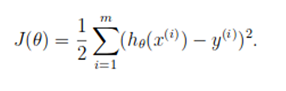

### <b>Algorithm :</b>

In [93]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
acc = lr.score(x_test.T,y_test.T)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 62.30%


<b>4.Support Vector Machines:</b>
<br>The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.
<br>SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine
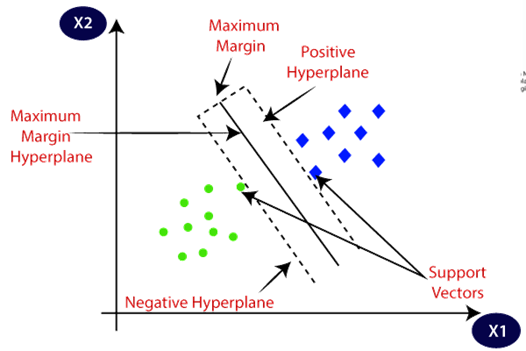

<b>SVM can be of two types:</b>
<br>1.Linear SVM: Linear SVM is used for linearly separable data, which means if a dataset can be classified into two classes by using a single straight line, then such data is termed as linearly separable data, and classifier is used called as Linear SVM classifier.
<br>2.Non-linear SVM: Non-Linear SVM is used for non-linearly separated data, which means if a dataset cannot be classified by using a straight line, then such data is termed as non-linear data and classifier used is called as Non-linear SVM classifier.

Hyperplane: There can be multiple lines/decision boundaries to segregate the classes in n-dimensional space, but we need to find out the best decision boundary that helps to classify the data points. This best boundary is known as the hyperplane of SVM.
<br>The dimensions of the hyperplane depend on the features present in the dataset, which means if there are 2 features (as shown in image), then hyperplane will be a straight line. And if there are 3 features, then hyperplane will be a 2-dimension plane.
<br>We always create a hyperplane that has a maximum margin, which means the maximum distance between the data points.


<b>Working:</b>
<br>We use constrained optimization approach to solve SVM
<br>There are two types of approaches to solving a linear SVM problem:
<br>1.Hard Margin SVM:
<br> This approach is used when the data points are perfectly linearly separable. 
<br> The formulation for this is given as:
<br> We consider a vector (W) perpendicular to the median line (red line) and, an unknown sample which can be represented by vector x.
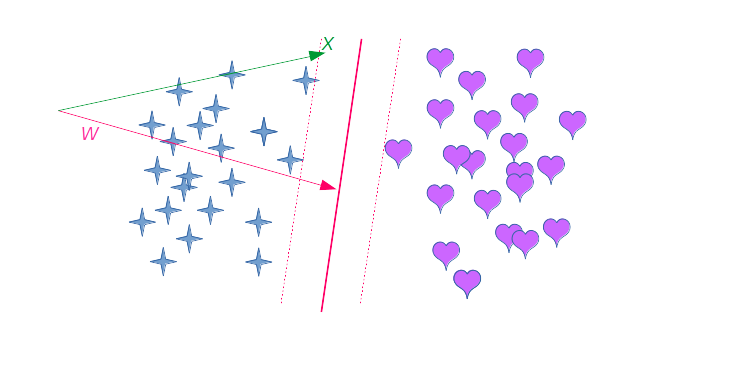
<br> To determine on which side of the median line (red solid line) the unknown sample X lies, we first take a projection of X along the perpendicular to the median line, which is w. If this projection is greater than some number (called as bias), then we say that the unknown sample X is on the right side of the line. It is usually called as decision rule
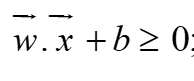
<br> We don't know the bias and w so for htat we use the known which insists the condition:
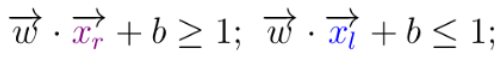
                  <br> where Xr represents sample on right of boundary and Xl represents that of in left

<br> Now we need to have a single which represents all these conditions
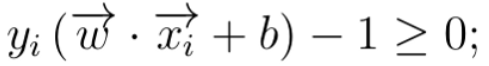
<br> for support vectors we have the equation as:
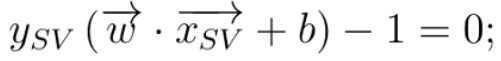
<br> Since our main aim is to find the widest road between the samples, we will now proceed to define the distance between the two parallel lines.
To do this we first select any two support vectors on either side and calculate the difference vector.
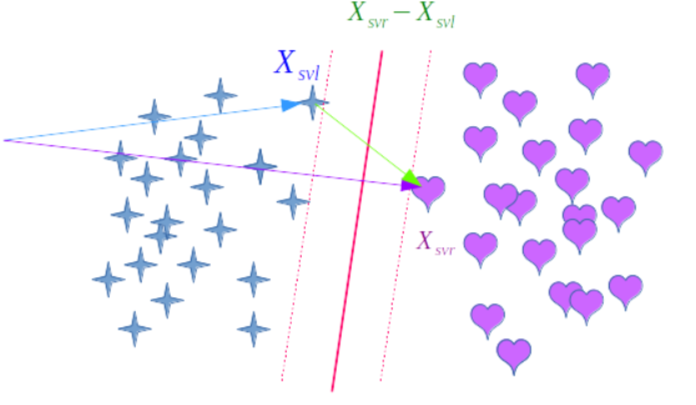
<br>  we have already defined a vector perpendicular to the best line, i.e. w. So we are ready to formulate the distance of the road as: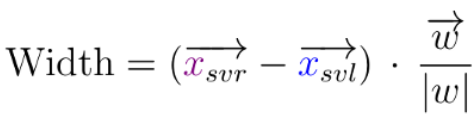
<br> using the fact that y is positive for samples on the right and negative for samples on the left, we can simplify equation as:
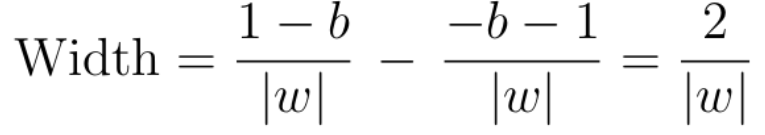
Since we want to maximize the width of the road we do
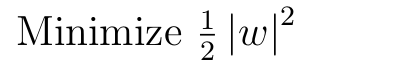


<br>2.Soft Margin SVM
<br> In most of the cases Hard Margin SVM doesn not work because the data may not alway be linearly separable
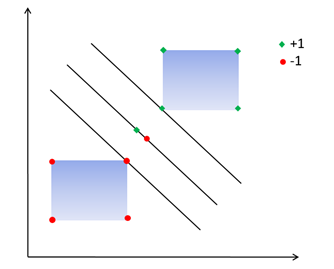
<br>The figure is an example for this
<br>To avoid this we allow certain data points to be misclassified so that we have a better accuracy overall
<br>The formulation for this is given as:
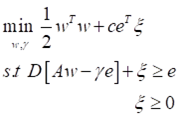
<br>The new variable introduced is called as a Slack Variable. Slack variables are introduced to allow certain constraints to be violated. That is, certain train- ing points will be allowed to be within the margin. We want the number of points within the margin to be as small as possible, and of course we want their penetration of the margin to be as small as possible.
<br>First, the slack variable indictates the degree to which the constraint on the ith datapoint can be violated. Second, by adding the slack variable to the energy function we are aiming to simultaneously minimize the use of the slack variables.
<br>The variable C is the penalty strength, which specifies how much do we care about errors (training points that are on the wrong side). The C=∞ corresponds to a hard-margin (if possible). 
<br>The variable C is also a hyper-parameter in this algorithm

### <b>Algorithm :</b>

In [94]:
from sklearn.svm import SVC

svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 68.85%


<b>5.Decision Trees</b>
<br>A decision tree is a flowchart-like tree structure where an internal node represents feature, the branch represents a decision rule, and each leaf node represents the outcome. 
<br>Decision-tree algorithm falls under the category of supervised learning algorithms.
<br>It works for both continuous as well as categorical output variables.
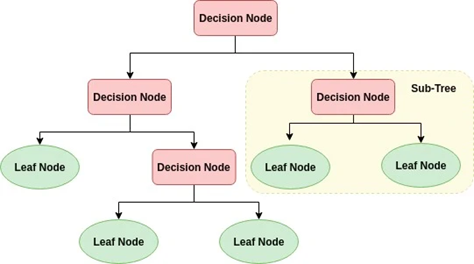

<b>Working :</b>
<br>At the beginning, we consider the whole training set as the root.
<br>Find the best attribute and place it on the root node of the tree.
<br>Now, split the training set of the dataset into subsets. While making the subset make sure that each subset of training dataset should have the same value for an attribute.
<br>On the basis of attribute values records are distributed recursively.
<br>Find leaf nodes in all branches by repeating 1 and 2 on each subset.

<b>Attribute Selection Measures</b>
<br>1.GINI index: Gini Index is a metric to measure how often a randomly chosen element would be incorrectly identified. It means an attribute with lower gini index should be preferred.
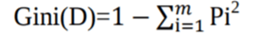
<br>2.Entropy: Entropy is the measure of uncertainty of a random variable, it characterizes the impurity of an arbitrary collection of examples. .
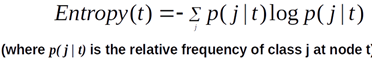
<br>3.Gain Ratio: Gain ratio handles the issue of bias by normalizing the information gain using Split Info.
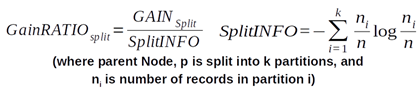
<br>4.Information Gain:Information gain computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values.
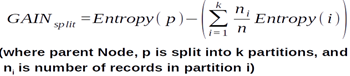

### <b>Algorithm:</b>

In [95]:
from sklearn.tree import DecisionTreeClassifier,plot_tree, export_text
dtc = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=3, class_weight='balanced')
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_test.T, y_test.T)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 81.97%


[0 1]
[0.10623224 0.1015395  0.47114921 0.         0.         0.
 0.         0.         0.         0.         0.         0.21489813
 0.10618093]


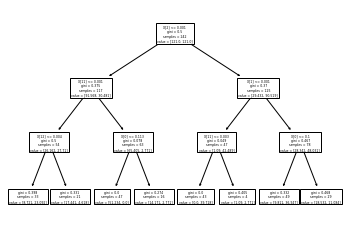

In [96]:
#VISUALIZING THE TREE
print(dtc.classes_) # A list of arrays of class labels
print(dtc.feature_importances_) # Importance of each features in splitting
plot_tree(dtc)  # Plotting the decision tree
plt.show()

In [97]:
text_representation = export_text(dtc)
print(text_representation)

|--- feature_2 <= 0.00
|   |--- feature_11 <= 0.00
|   |   |--- feature_12 <= 0.00
|   |   |   |--- class: 1
|   |   |--- feature_12 >  0.00
|   |   |   |--- class: 0
|   |--- feature_11 >  0.00
|   |   |--- feature_0 <= 0.11
|   |   |   |--- class: 0
|   |   |--- feature_0 >  0.11
|   |   |   |--- class: 0
|--- feature_2 >  0.00
|   |--- feature_1 <= 0.00
|   |   |--- feature_11 <= 0.00
|   |   |   |--- class: 1
|   |   |--- feature_11 >  0.00
|   |   |   |--- class: 1
|   |--- feature_1 >  0.00
|   |   |--- feature_0 <= 0.10
|   |   |   |--- class: 1
|   |   |--- feature_0 >  0.10
|   |   |   |--- class: 0



<b>6.Random Forest Algorithm:</b>
<br>Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time.
<br>It is widely used due to its simplicity and diversity. It can be used to solve both classification and Regression problems.
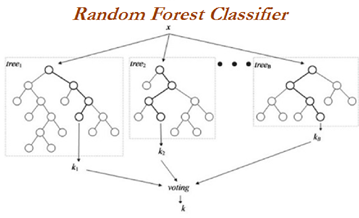
<br>The "forest" it builds, is an ensemble of decision trees, usually trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.
<br>Random forest adds additional randomness to the model, while growing the trees. Instead of searching for the most important feature while splitting a node, it searches for the best feature among a random subset of features. This results in a wide diversity that generally results in a better model.
<br>In the case of a random forest, hyperparameters include the number of decision trees in the forest and the number of features considered by each tree when splitting a node. 

<b>Working :</b>
<br>Instead of taking the data-set as a whole, certain rows and columns are randomly sampled from the dataset and for each of these samples we create a decision tree.
<br>Then the test data is passed into each of these trees and output for each is stored.
<br> In case of classification output is determined by a majority vote
<br> In case of regression by taking mean or median of outputs.
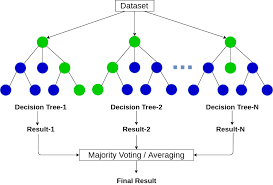


    

### <b>Algorithm: </b>

In [98]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T,y_test.T)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 85.25%


<b>7.Neural Network</b>
An example of a neural network is show below
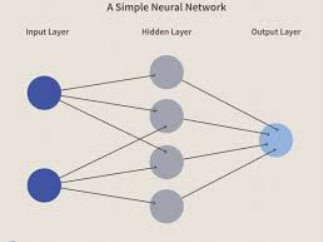


As seen above there are 3 main layers for the neural network.They are: <br>1.Input Layer: This layer tells us the number of input features based on which the model classifies out output. <br>2.Hidden Layer: This Layer is the one in which the function applies weights to the inputs and directs them through an activation function as the output. In short, the hidden layers perform nonlinear transformations of the inputs entered into the network. <br>3.Output Layer:Produces the output for the given inputs

Each hidden layer is comprised of many neurons.An example of a neuron is shown below

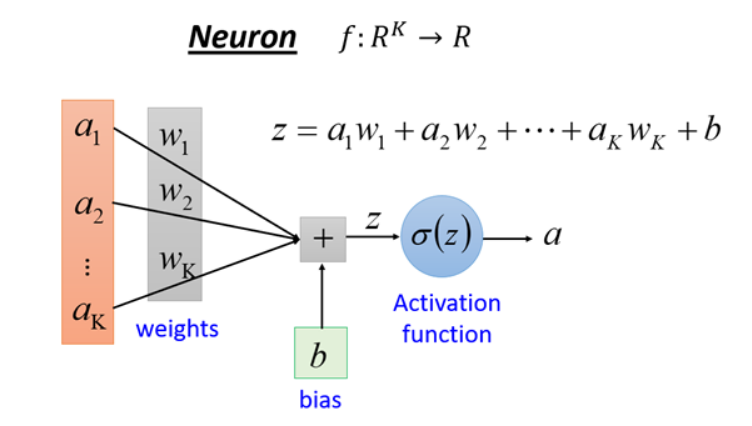

Each neuron is a mathematical operation that takes it's input, multiplies it by it's weights and then passes the sum through the activation function to the other neurons.

<b>Activation Function:</b>
<br>Activation functions are mathematical equations that determine the output of a neural network. The function is attached to each neuron in the network, and determines whether it should be activated or not, based on whether each neuron's input is relevant for the model's prediction.
<br>There are two types of Activation Functions
<br>1.Linear activation functions
<br>2.Non-Linear activation functions

Some of the commonly used non-linear activation functions are:
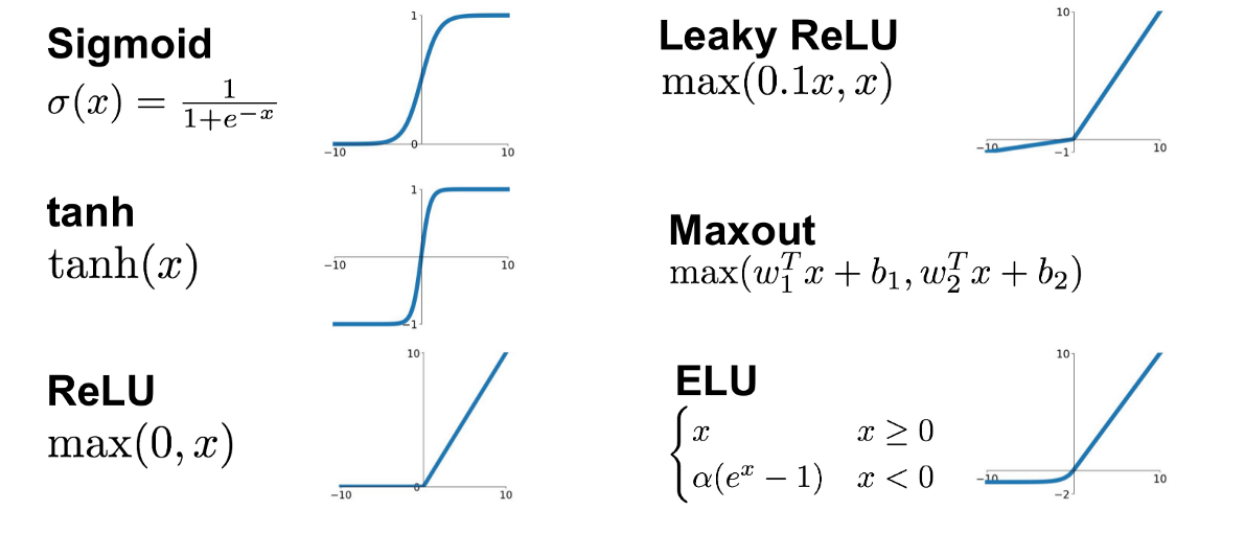

After this in the output layer we use a softmax function to classify our problem.
<br>The softmax function is a function that turns a vector of K real values into a vector of K real values that sum to 1. The input values can be positive, negative, zero, or greater than one, but the softmax transforms them into values between 0 and 1, so that they can be interpreted as probabilities. If one of the inputs is small or negative, the softmax turns it into a small probability, and if an input is large, then it turns it into a large probability, but it will always remain between 0 and 1.
<br>The softmax formula is as follows:
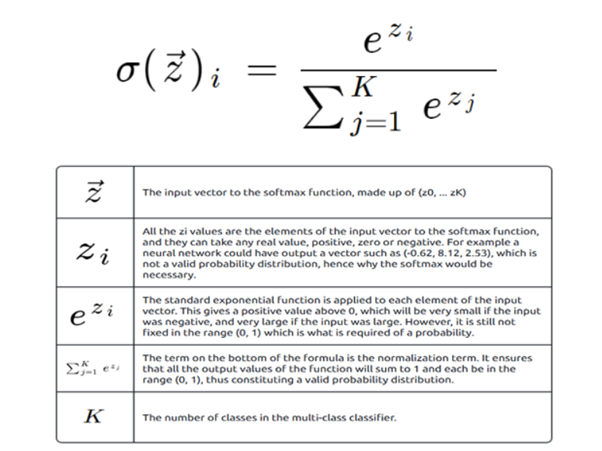
An example for this is given below:
Consider the vector
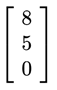
Using the formula we get
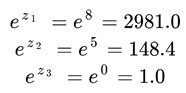
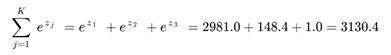
The output vector is:
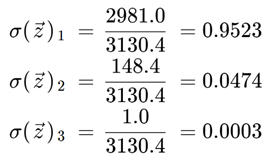
<b> Cost Function: </b>
Given a set of network parameters each output will have a cost function
<br>Cost can be euclidean distance or cross entropy of output and target.
<br>The main objective of our algorithm is to minimize the cost function by varying the values of weights and bias in the hidden layers
<br> We can do this by using algorithms like Gradient Descent Algorithm.

### <b>Algorithm :</b>

In [127]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 16)                224       
_________________________________________________________________
dropout_21 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_22 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 9         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________
None


In [119]:
# fit the keras model on the dataset
history=binary_model.fit(x_train.T, y_train, epochs=150, batch_size=10)

Epoch 1/150
242/242 [==============================] - 0s 82us/step - loss: 0.6675 - accuracy: 0.5992
Epoch 2/150
242/242 [==============================] - 0s 91us/step - loss: 0.6592 - accuracy: 0.6364
Epoch 3/150
242/242 [==============================] - 0s 87us/step - loss: 0.6610 - accuracy: 0.6198
Epoch 4/150
242/242 [==============================] - 0s 140us/step - loss: 0.6534 - accuracy: 0.6157
Epoch 5/150
242/242 [==============================] - 0s 99us/step - loss: 0.6662 - accuracy: 0.6240
Epoch 6/150
242/242 [==============================] - 0s 115us/step - loss: 0.6597 - accuracy: 0.6446
Epoch 7/150
242/242 [==============================] - 0s 115us/step - loss: 0.6545 - accuracy: 0.5992
Epoch 8/150
242/242 [==============================] - 0s 111us/step - loss: 0.6526 - accuracy: 0.6405
Epoch 9/150
242/242 [==============================] - 0s 124us/step - loss: 0.6614 - accuracy: 0.6116
Epoch 10/150
242/242 [==============================] - 0s 107us/step - loss:

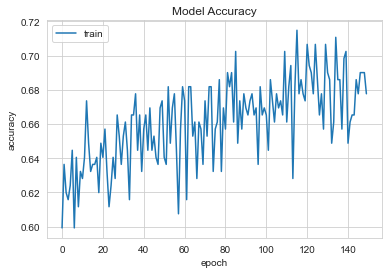

In [120]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'])
plt.show()

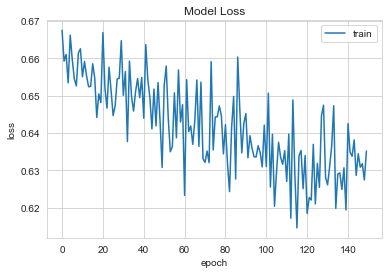

In [121]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'])
plt.show()

In [122]:
# evaluate the keras model
_, accuracy = binary_model.evaluate(x_test.T, y_test, verbose=0)
accuracies['NN'] = accuracy*100
print('Accuracy: %.2f' % (accuracy*100))


Accuracy: 73.77


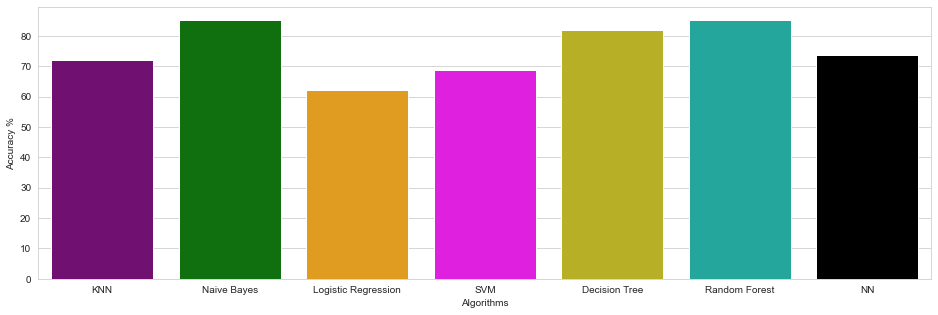

In [123]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE","black"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [124]:
# Predicted values
y_head_lr = lr.predict(x_test.T)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train.T, y_train.T)
y_head_knn = knn3.predict(x_test.T)
y_head_svm = svm.predict(x_test.T)
y_head_nb = nb.predict(x_test.T)
y_head_dtc = dtc.predict(x_test.T)
y_head_rf = rf.predict(x_test.T)
y_head_nn=binary_model.predict_classes(x_test.T)

In [125]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)
cm_nn=confusion_matrix(y_test,y_head_nn)

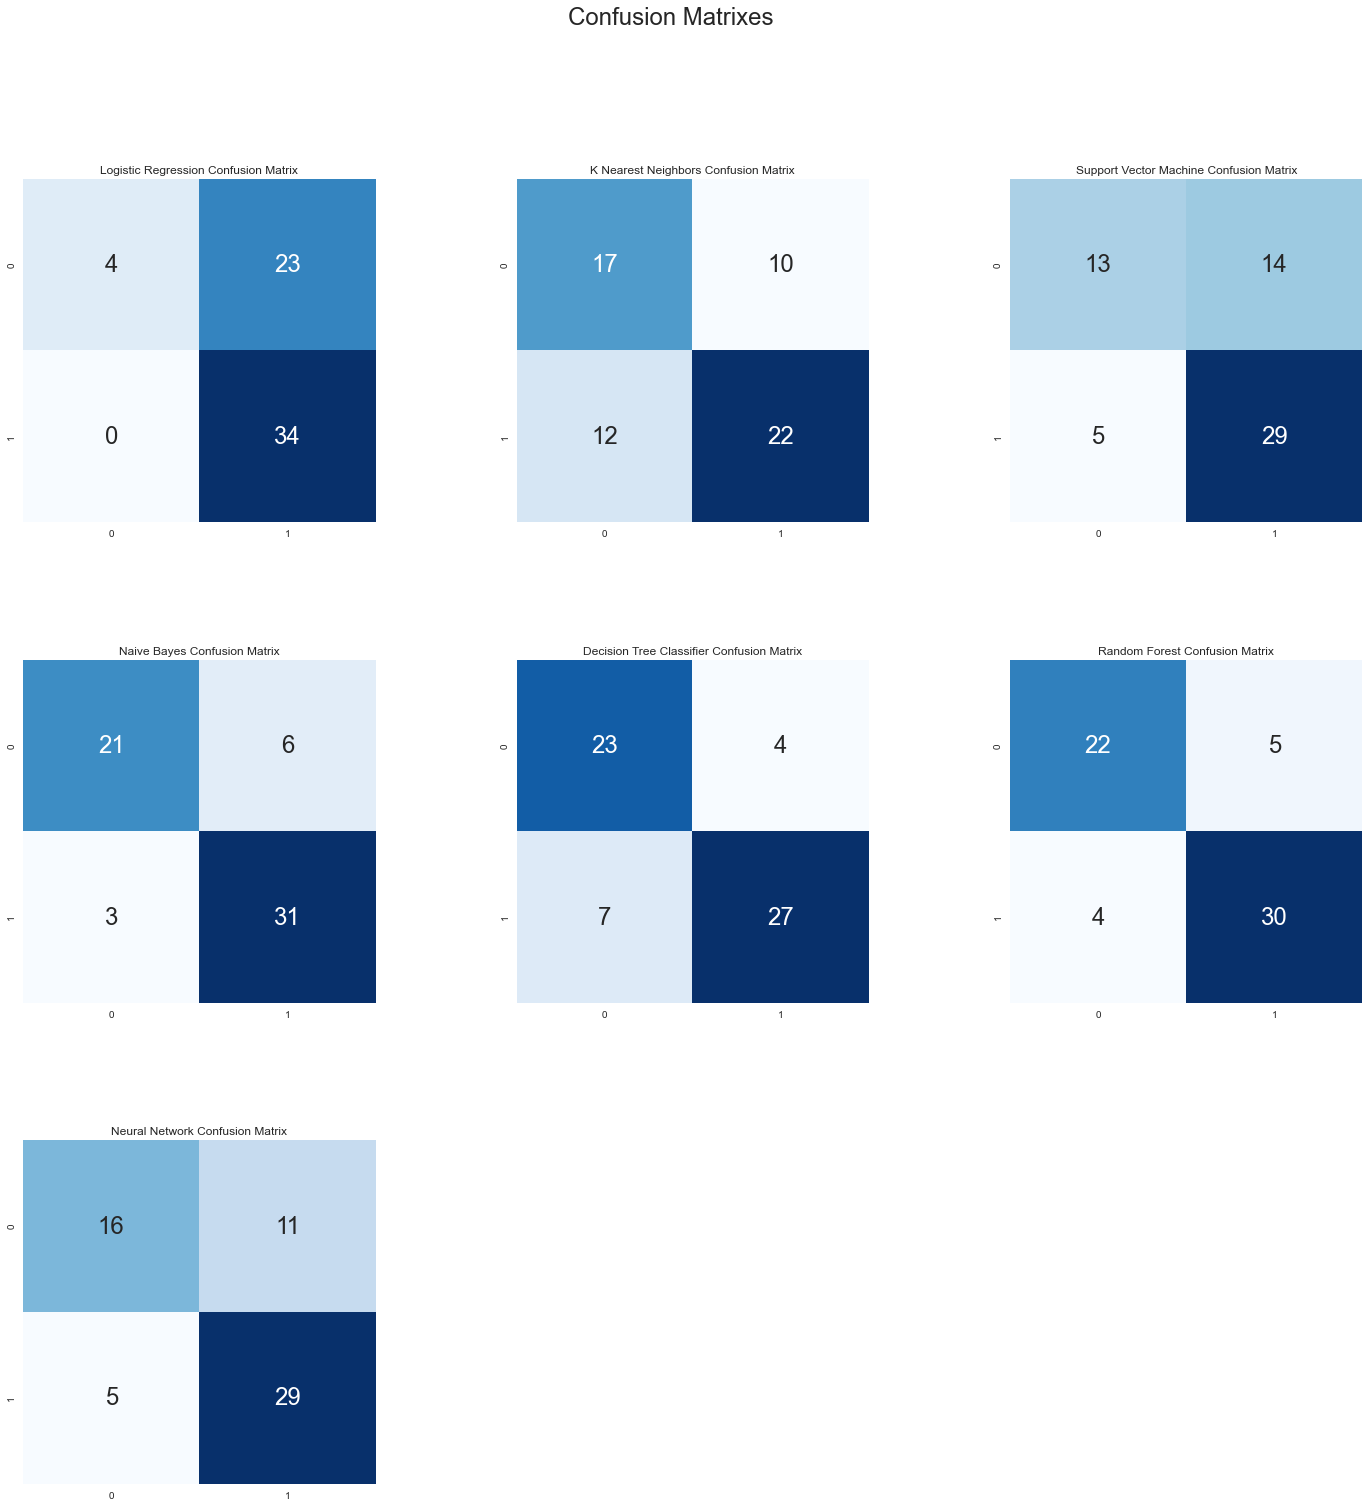

In [126]:
plt.figure(figsize=(24,24))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(3,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,7)
plt.title("Neural Network Confusion Matrix")
sns.heatmap(cm_nn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()